### Data cleaning and EDA project using a Real Estate data set from kaggle.


In [17]:
### import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### bring in the dataset

In [18]:
df= pd.read_csv('real_estate_texas_500_2024.csv')

In [19]:
df

,url,status,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,sub_type,text,type,year_built
0,https://www.realtor.com/realestateandhomes-det...,for_sale,9773941616,240000.0,2,2.0,2.0,3.0,1190.0,1.0,NaN,Welcome home to your peaceful retreat nestled ...,single_family,2018.0
1,https://www.realtor.com/realestateandhomes-det...,for_sale,9224923922,379900.0,4,3.0,3.0,4.0,2033.0,1.0,NaN,"Beautiful country home on 0.85 fenced acres, m...",single_family,2002.0
2,https://www.realtor.com/realestateandhomes-det...,for_sale,9840661824,370000.0,2,2.0,2.0,4.0,2062.0,1.0,NaN,PRICED TO SELL CORNER LOT HAS A STORM SHELTER ...,single_family,2012.0
3,https://www.realtor.com/realestateandhomes-det...,for_sale,7338317229,444000.0,4,3.0,3.0,5.0,3705.0,2.0,NaN,Come check out country living in the city! Are...,single_family,1985.0
4,https://www.realtor.com/realestateandhomes-det...,for_sale,7285845528,569000.0,2,2.0,2.0,3.0,3282.0,2.0,NaN,Welcome to your dream retreat! Nestled on over...,single_family,1981.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,https://www.realtor.com/realestateandhomes-det...,for_sale,9697052071,357707.0,2,2.0,2.0,3.0,1810.0,1.0,NaN,About the Community : Community Highlights - Z...,single_family,NaN
497,https://www.realtor.com/realestateandhomes-det...,for_sale,8417528805,340000.0,2,2.0,2.0,3.0,1438.0,1.0,NaN,Don't miss out on this wonderfully updated 3 b...,single_family,1979.0
498,https://www.realtor.com/realestateandhomes-det...,for_sale,9910094492,2800000.0,0,NaN,NaN,NaN,4000.0,2.0,NaN,Beautiful 120 acres that has 60' commercial ga...,farm,2023.0
499,https://www.realtor.com/realestateandhomes-det...,for_sale,9569395776,112500.0,0,NaN,NaN,NaN,NaN,NaN,NaN,Discover Cedar Creek's perfect blend of natura...,land,NaN


### neccesary information about the dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              501 non-null    object 
 1   status           501 non-null    object 
 2   id               501 non-null    int64  
 3   listPrice        499 non-null    float64
 4   baths            501 non-null    int64  
 5   baths_full       436 non-null    float64
 6   baths_full_calc  436 non-null    float64
 7   beds             440 non-null    float64
 8   sqft             438 non-null    float64
 9   stories          391 non-null    float64
 10  sub_type         10 non-null     object 
 11  text             495 non-null    object 
 12  type             501 non-null    object 
 13  year_built       289 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 54.9+ KB


### Viewing missing values

In [21]:
df.isna()

,url,status,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,sub_type,text,type,year_built
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,False,False,False,False,False,False,False,False,False,False,True,False,False,True
497,False,False,False,False,False,False,False,False,False,False,True,False,False,False
498,False,False,False,False,False,True,True,True,False,False,True,False,False,False
499,False,False,False,False,False,True,True,True,True,True,True,False,False,True


### missing value sum up

In [22]:
df.isna().sum()

url                  0
status               0
id                   0
listPrice            2
baths                0
baths_full          65
baths_full_calc     65
beds                61
sqft                63
stories            110
sub_type           491
text                 6
type                 0
year_built         212
dtype: int64

### viewing the first 20 rows of data

In [23]:
df.head(20)

,url,status,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,sub_type,text,type,year_built
0,https://www.realtor.com/realestateandhomes-det...,for_sale,9773941616,240000.0,2,2.0,2.0,3.0,1190.0,1.0,NaN,Welcome home to your peaceful retreat nestled ...,single_family,2018.0
1,https://www.realtor.com/realestateandhomes-det...,for_sale,9224923922,379900.0,4,3.0,3.0,4.0,2033.0,1.0,NaN,"Beautiful country home on 0.85 fenced acres, m...",single_family,2002.0
2,https://www.realtor.com/realestateandhomes-det...,for_sale,9840661824,370000.0,2,2.0,2.0,4.0,2062.0,1.0,NaN,PRICED TO SELL CORNER LOT HAS A STORM SHELTER ...,single_family,2012.0
3,https://www.realtor.com/realestateandhomes-det...,for_sale,7338317229,444000.0,4,3.0,3.0,5.0,3705.0,2.0,NaN,Come check out country living in the city! Are...,single_family,1985.0
4,https://www.realtor.com/realestateandhomes-det...,for_sale,7285845528,569000.0,2,2.0,2.0,3.0,3282.0,2.0,NaN,Welcome to your dream retreat! Nestled on over...,single_family,1981.0
5,https://www.realtor.com/realestateandhomes-det...,for_sale,7550452644,875000.0,5,3.0,3.0,4.0,4873.0,2.0,NaN,Exquisite custom home nestled among mature tre...,single_family,1999.0
6,https://www.realtor.com/realestateandhomes-det...,for_sale,9852404810,214500.0,2,2.0,2.0,4.0,2260.0,NaN,NaN,Welcome to your spacious home in the heart of ...,single_family,2020.0
7,https://www.realtor.com/realestateandhomes-det...,for_sale,7370499961,184900.0,3,3.0,3.0,5.0,2109.0,1.0,NaN,"Potential, Potential, Potential! This One Is A...",single_family,1956.0
8,https://www.realtor.com/realestateandhomes-det...,for_sale,8021215105,374900.0,2,2.0,2.0,4.0,1896.0,1.0,NaN,Welcome to country living! Spacious lot sittin...,single_family,2000.0
9,https://www.realtor.com/realestateandhomes-det...,for_sale,9637298240,199900.0,2,2.0,2.0,3.0,1621.0,1.0,NaN,Your family is all that's needed to fill this ...,single_family,2004.0


### veiwing the last five rows of dataset

In [24]:
df.tail()

,url,status,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,sub_type,text,type,year_built
496,https://www.realtor.com/realestateandhomes-det...,for_sale,9697052071,357707.0,2,2.0,2.0,3.0,1810.0,1.0,NaN,About the Community : Community Highlights - Z...,single_family,NaN
497,https://www.realtor.com/realestateandhomes-det...,for_sale,8417528805,340000.0,2,2.0,2.0,3.0,1438.0,1.0,NaN,Don't miss out on this wonderfully updated 3 b...,single_family,1979.0
498,https://www.realtor.com/realestateandhomes-det...,for_sale,9910094492,2800000.0,0,NaN,NaN,NaN,4000.0,2.0,NaN,Beautiful 120 acres that has 60' commercial ga...,farm,2023.0
499,https://www.realtor.com/realestateandhomes-det...,for_sale,9569395776,112500.0,0,NaN,NaN,NaN,NaN,NaN,NaN,Discover Cedar Creek's perfect blend of natura...,land,NaN
500,https://www.realtor.com/realestateandhomes-det...,for_sale,9434894519,109000.0,1,1.0,1.0,3.0,1352.0,1.0,NaN,Nice location with significant amount of count...,single_family,1960.0


### viewing the number of missing value rows on listprice column

In [25]:
df[df['listPrice'].isna()]

,url,status,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,sub_type,text,type,year_built
257,https://www.realtor.com/realestateandhomes-det...,for_sale,9031060769,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,The Audrey is a wonderful floor plan that pres...,single_family,NaN
456,https://www.realtor.com/realestateandhomes-det...,for_sale,9530697722,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,A media and study greet you upon entering the ...,single_family,NaN


### droping the sub_type column on the dataset

In [26]:
df.drop("sub_type", axis=1, inplace=True)
print(df)

                                                   url    status          id  \
0    https://www.realtor.com/realestateandhomes-det...  for_sale  9773941616   
1    https://www.realtor.com/realestateandhomes-det...  for_sale  9224923922   
2    https://www.realtor.com/realestateandhomes-det...  for_sale  9840661824   
3    https://www.realtor.com/realestateandhomes-det...  for_sale  7338317229   
4    https://www.realtor.com/realestateandhomes-det...  for_sale  7285845528   
..                                                 ...       ...         ...   
496  https://www.realtor.com/realestateandhomes-det...  for_sale  9697052071   
497  https://www.realtor.com/realestateandhomes-det...  for_sale  8417528805   
498  https://www.realtor.com/realestateandhomes-det...  for_sale  9910094492   
499  https://www.realtor.com/realestateandhomes-det...  for_sale  9569395776   
500  https://www.realtor.com/realestateandhomes-det...  for_sale  9434894519   

     listPrice  baths  baths_full  bath

### describing the statistic of the dataset

In [27]:
df.describe()

,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,year_built
count,5.010000e+02,4.990000e+02,501.000000,436.000000,436.000000,440.000000,438.000000,391.000000,289.000000
mean,9.193045e+09,5.106686e+05,2.323353,2.332569,2.332569,3.454545,2334.568493,1.375959,1999.536332
std,7.789197e+08,1.321054e+06,1.286559,0.759276,0.759276,0.914439,3220.244985,0.525586,25.400942
min,7.021680e+09,1.000000e+04,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1891.000000
25%,8.995365e+09,2.647450e+05,2.000000,2.000000,2.000000,3.000000,1604.250000,1.000000,1981.000000
50%,9.419976e+09,3.749000e+05,2.000000,2.000000,2.000000,3.000000,2034.500000,1.000000,2006.000000
75%,9.798074e+09,5.390000e+05,3.000000,3.000000,3.000000,4.000000,2636.500000,2.000000,2022.000000
max,9.992374e+09,2.895000e+07,8.000000,8.000000,8.000000,9.000000,67139.000000,4.000000,2024.000000


### filling the missing value with the median on listprice column

In [28]:
df['listPrice'].fillna(df['listPrice'].median(),inplace=True)

In [29]:
df.isna().sum()

url                  0
status               0
id                   0
listPrice            0
baths                0
baths_full          65
baths_full_calc     65
beds                61
sqft                63
stories            110
text                 6
type                 0
year_built         212
dtype: int64

### filling the missing value with the mean on baths_full column

In [30]:
df['baths_full'].fillna(value='2.3', inplace=True, limit=65)


In [31]:
df.isna().sum()

url                  0
status               0
id                   0
listPrice            0
baths                0
baths_full           0
baths_full_calc     65
beds                61
sqft                63
stories            110
text                 6
type                 0
year_built         212
dtype: int64

### filling the missing value with the median on baths_full_calc column

In [32]:
df['baths_full_calc'].fillna(df['baths_full_calc'].median(),inplace=True)

In [33]:
df.isna().sum()

url                  0
status               0
id                   0
listPrice            0
baths                0
baths_full           0
baths_full_calc      0
beds                61
sqft                63
stories            110
text                 6
type                 0
year_built         212
dtype: int64

### filling the missing value with the median and mean on beds,sqft,year_built and stories column

In [34]:
df["beds"].fillna(df["beds"].median(),inplace=True)
df["sqft"].fillna(df["sqft"].mean(),inplace=True)
df["year_built"].fillna(df["year_built"].median(),inplace=True)
df['stories'].fillna(df['stories'].median(),inplace=True)

In [35]:
df.isna().sum()

url                0
status             0
id                 0
listPrice          0
baths              0
baths_full         0
baths_full_calc    0
beds               0
sqft               0
stories            0
text               6
type               0
year_built         0
dtype: int64

### droping the text column on the dataset

In [36]:
df.drop("text", axis=1, inplace=True)

### confirming if there are still missing values

In [37]:
df.isna().sum()

url                0
status             0
id                 0
listPrice          0
baths              0
baths_full         0
baths_full_calc    0
beds               0
sqft               0
stories            0
type               0
year_built         0
dtype: int64

### EDA (Exploratory data analysis)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              501 non-null    object 
 1   status           501 non-null    object 
 2   id               501 non-null    int64  
 3   listPrice        501 non-null    float64
 4   baths            501 non-null    int64  
 5   baths_full       501 non-null    object 
 6   baths_full_calc  501 non-null    float64
 7   beds             501 non-null    float64
 8   sqft             501 non-null    float64
 9   stories          501 non-null    float64
 10  type             501 non-null    object 
 11  year_built       501 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 47.1+ KB


In [39]:
df.shape

(501, 12)

In [40]:
df.dtypes

url                 object
status              object
id                   int64
listPrice          float64
baths                int64
baths_full          object
baths_full_calc    float64
beds               float64
sqft               float64
stories            float64
type                object
year_built         float64
dtype: object

In [41]:
df.columns

Index(['url', 'status', 'id', 'listPrice', 'baths', 'baths_full',
       'baths_full_calc', 'beds', 'sqft', 'stories', 'type', 'year_built'],
      dtype='object')

### checking the count of listprice base on the year the house was built

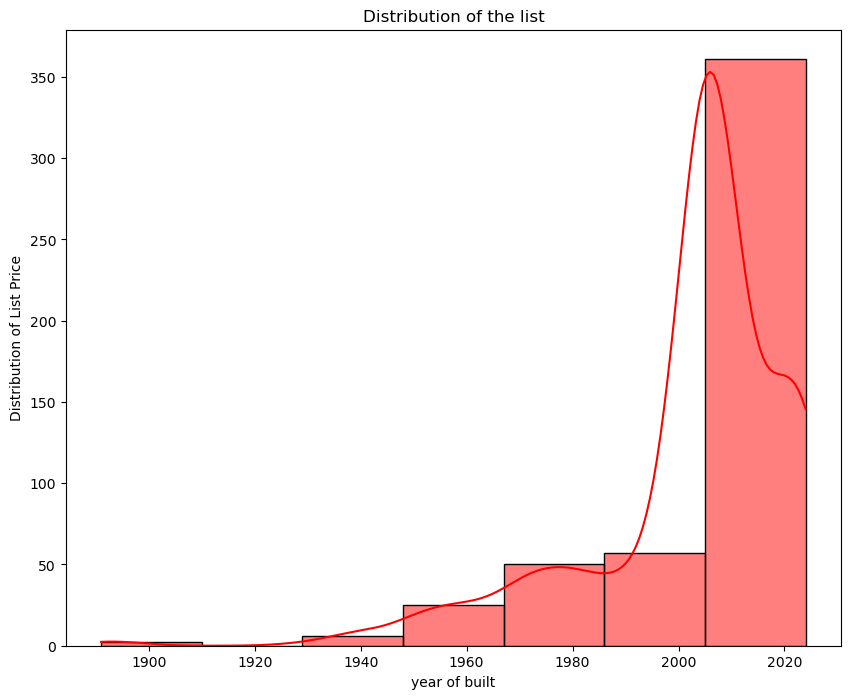

In [42]:
plt.figure (figsize=(10,8))
sns.histplot(data= df["listPrice"], x = df["year_built"],bins = 7,kde = True,color= "red")
plt.title("Distribution of the list")
plt.xlabel("year of built")
plt.ylabel("Distribution of List Price")
plt.show()


### list price based on the numbers of bedrooms available in a house

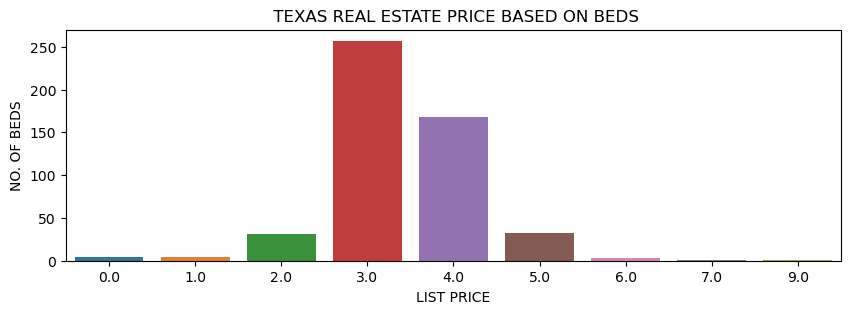

In [43]:
plt.figure(figsize=(10,3))
sns.countplot(data=df,x= "beds")
plt.title(" TEXAS REAL ESTATE PRICE BASED ON BEDS")
plt.xlabel("LIST PRICE")
plt.ylabel("NO. OF BEDS")
plt.show()

### price of house based on the square fit of the land

<function matplotlib.pyplot.show(close=None, block=None)>

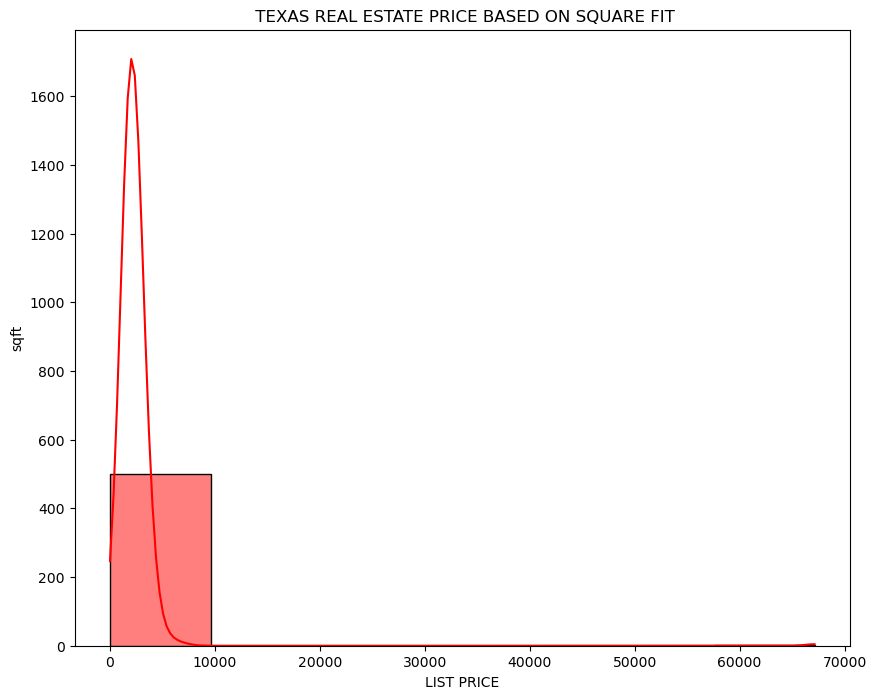

In [44]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x="sqft", bins=7, kde=True, color="red")
plt.title(" TEXAS REAL ESTATE PRICE BASED ON SQUARE FIT")
plt.xlabel("LIST PRICE")
plt.ylabel("sqft")
plt.show

### checking the numbers of storey base on the type

<function matplotlib.pyplot.show(close=None, block=None)>

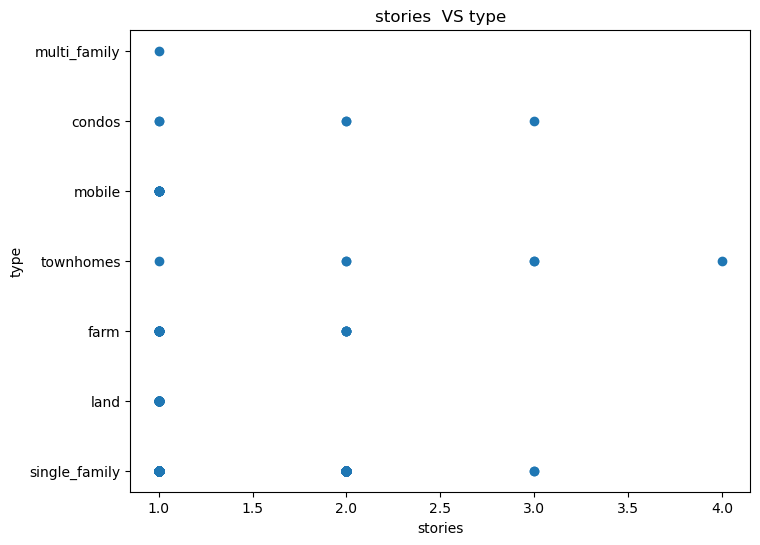

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(df['stories'], df['type'])
plt.title('stories  VS type')
plt.ylabel('type')
plt.xlabel('stories')
plt.show

### using numeric data only to check correlation

In [46]:
df.corr(numeric_only = True)

,id,listPrice,baths,baths_full_calc,beds,sqft,stories,year_built
id,1.000000,0.038970,-0.093264,0.049668,0.040916,0.045867,-0.029901,0.343160
listPrice,0.038970,1.000000,0.022501,0.098251,0.051759,0.037423,0.016230,0.044724
baths,-0.093264,0.022501,1.000000,0.717906,0.565441,0.065935,0.417398,0.098487
baths_full_calc,0.049668,0.098251,0.717906,1.000000,0.625835,0.166564,0.270356,0.171103
beds,0.040916,0.051759,0.565441,0.625835,1.000000,0.143555,0.245729,0.093879
sqft,0.045867,0.037423,0.065935,0.166564,0.143555,1.000000,0.061203,0.044543
stories,-0.029901,0.016230,0.417398,0.270356,0.245729,0.061203,1.000000,0.013189
year_built,0.343160,0.044724,0.098487,0.171103,0.093879,0.044543,0.013189,1.000000


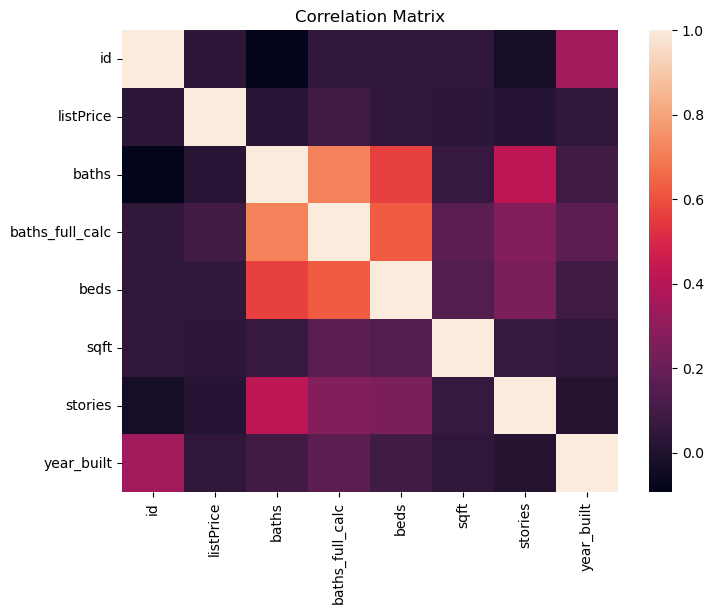

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only = True))
plt.title('Correlation Matrix')
plt.show()

C:\Users\EDIRIN EUODIA KEYAMO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


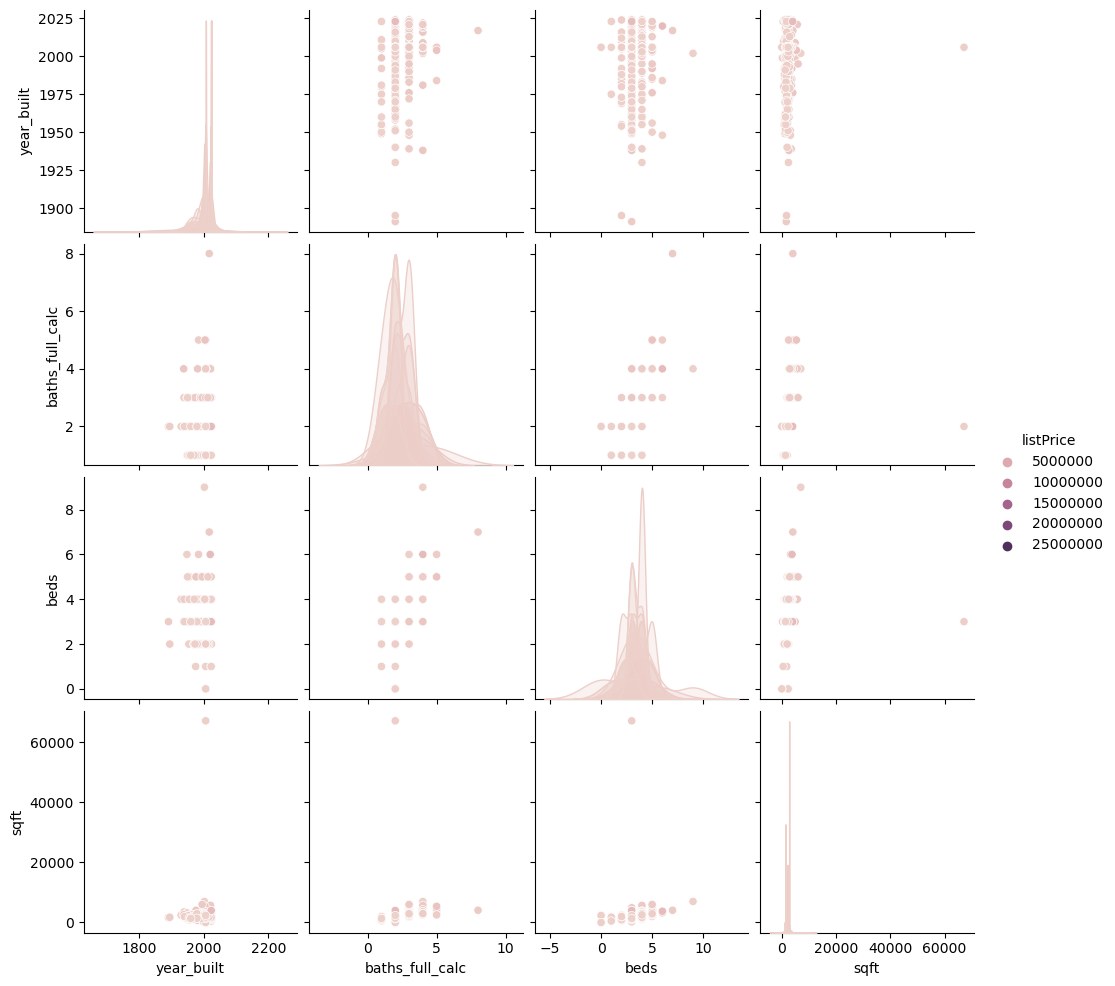

In [48]:
sns.pairplot(df[['year_built', 'baths_full_calc', 'beds', 'sqft', 'listPrice']], hue='listPrice')